In [19]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [21]:
#raw_data=pd.read_excel('C:/Users/user/Downloads/Jypiter/ZaradaAplikacija/WC Regresiono stablo.xlsx')


In [22]:
raw_data=raw_data[['godine', 'sektor', 'pol','zarada','razredi','struka']]


In [23]:
raw_data["struka"] = raw_data["struka"].astype(str)

In [24]:
X=raw_data[['godine', 'sektor', 'pol', 'razredi','struka']]
y=raw_data['zarada']

In [25]:
num_cols = ['godine']  
cat_cols = ['sektor',  'struka', 'pol',  'razredi'] 

In [26]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

X_transformed = preprocessor.fit_transform(X)

In [41]:

from sklearn.tree import DecisionTreeRegressor


dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=7, 
                               random_state=35)

In [42]:
dt_reg.fit(X_transformed, y)

DecisionTreeRegressor(max_depth=7, random_state=35)

In [29]:

y_pred = dt_reg.predict(X_transformed)


mse_score = mean_squared_error(y, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2 = dt_reg.score(X_transformed,y)
print('R^2 score : {0:.3f}'.format(r2))

MSE score : 14479.452
R^2 score : 0.986


In [30]:

from sklearn.metrics import mean_squared_error

print("Dubina | R² score | MSE")
print("-" * 30)

for depth in range(2, 11):  
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_transformed, y)
    
    y_pred = model.predict(X_transformed)
    r2 = model.score(X_transformed, y)
    mse = mean_squared_error(y, y_pred)
    
    print(f"{depth:<6} | {r2:.3f}     | {mse:.2f}")

Dubina | R² score | MSE
------------------------------
2      | 0.821     | 184061.62
3      | 0.946     | 55606.24
4      | 0.964     | 37340.70
5      | 0.971     | 29486.70
6      | 0.976     | 24198.69
7      | 0.986     | 14479.45
8      | 0.992     | 8500.26
9      | 0.997     | 3483.84
10     | 0.998     | 1563.03


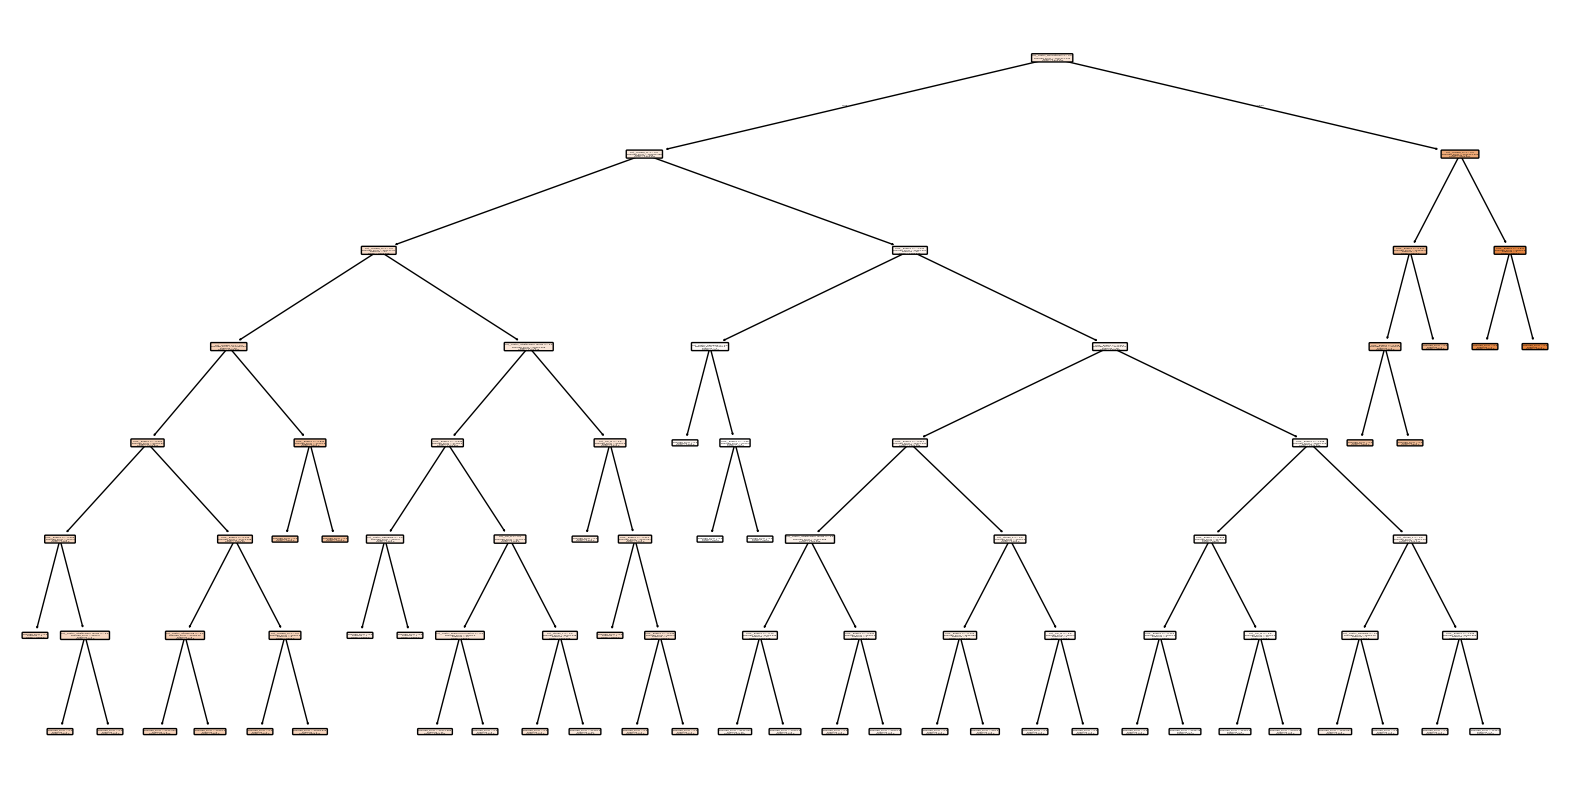

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  
plot_tree(dt_reg, 
          feature_names=preprocessor.get_feature_names_out(), 
          filled=True, 
          rounded=True)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_transformed, y)
y_pred_rf = rf_model.predict(X_transformed)

print("\n--- Random Forest ---")
print(f"R² score: {r2_score(y, y_pred_rf):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred_rf):.2f}")
print(f"MAE: {mean_absolute_error(y, y_pred_rf):.2f}")


from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_transformed, y)
y_pred_xgb = xgb_model.predict(X_transformed)

print("\n--- XGBoost ---")
print(f"R² score: {r2_score(y, y_pred_xgb):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred_xgb):.2f}")
print(f"MAE: {mean_absolute_error(y, y_pred_xgb):.2f}")


--- Random Forest ---
R² score: 0.980
MSE: 20227.05
MAE: 114.58

--- XGBoost ---
R² score: 0.999
MSE: 1259.04
MAE: 26.25


In [32]:
import pandas as pd


output_df = raw_data.copy()


output_df["predikcija_zarade_XGBoost"] = y_pred_xgb


#output_df.to_excel('C:/Users/jelena.pantic/Downloads/Jypiter/zarade_sa_predikcijom_XGBoost.xlsx', index=False)

#print("Fajl je uspešno sačuvan kao 'zarade_sa_predikcijom_XGBoost.xlsx'")

In [51]:

greske = y - y_pred_xgb 


maks_greska = greske.max()


min_greska = greske.min()

 
aps_max_greska = abs(greske).max()


print("\n--- Extreme Errors of the XGBoost Model ---")
print(f"Largest overestimation (actual - predicted): {maks_greska:.2f} €")
print(f"Largest underestimation (actual - predicted): {min_greska:.2f} €")
print(f"Largest absolute error: {aps_max_greska:.2f} €")


--- Extreme Errors of the XGBoost Model ---
Largest overestimation (actual - predicted): 96.81 €
Largest underestimation (actual - predicted): -90.11 €
Largest absolute error: 96.81 €


In [52]:
import numpy as np

percentage_errors = np.abs((y - y_pred_xgb) / y) * 100

mean_absolute_percentage_error = np.mean(percentage_errors)

print(f"\nMean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error:.2f}%")



Mean Absolute Percentage Error (MAPE): 1.84%


In [53]:
import joblib

# Sačuvaj XGBoost model i preprocessor
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

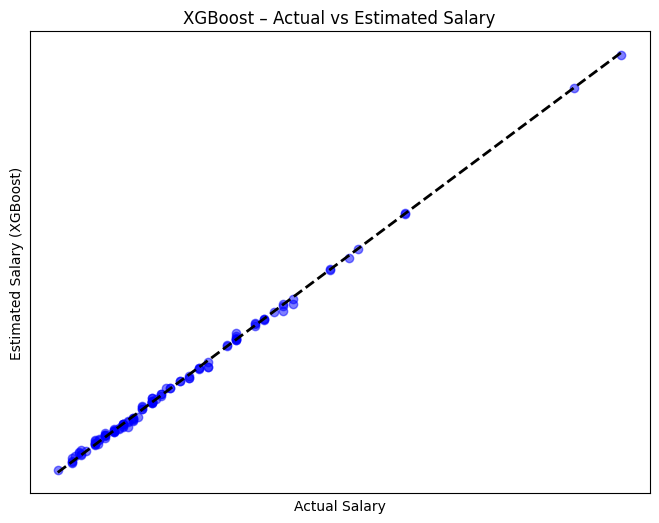

In [45]:


plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_xgb, alpha=0.5, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel("Actual Salary")
plt.ylabel("Estimated Salary (XGBoost)")
plt.title("XGBoost – Actual vs Estimated Salary")
plt.xticks([]) 
plt.yticks([])
plt.grid(True)
plt.show()

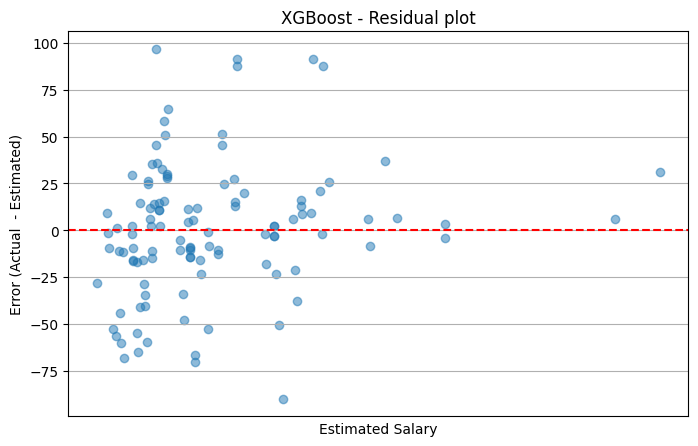

In [46]:
residuals = y - y_pred_xgb

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Estimated Salary")
plt.ylabel("Error (Actual  - Estimated)")
plt.title("XGBoost - Residual plot")
plt.xticks([]) 
plt.grid(True)
plt.show()

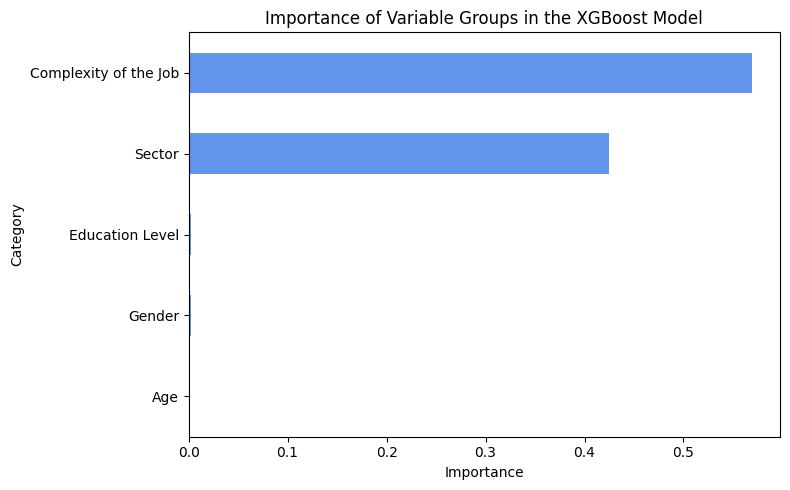

In [50]:

feature_names = preprocessor.get_feature_names_out()
importances = xgb_model.feature_importances_


feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


def odredi_kategoriju(ime):
    if "sektor" in ime:
        return "Sector"
    elif "razredi" in ime:
        return "Complexity of the Job"
    elif "pol" in ime:
        return "Gender"
    elif "struka" in ime:
        return "Education Level"
    elif "godine" in ime:
        return "Age"
    else:
        return "Other"

feat_df["Category"] = feat_df["Feature"].apply(odredi_kategoriju)


grupisano = feat_df.groupby("Category")["Importance"].sum().sort_values(ascending=False)

# Vizualizacija
plt.figure(figsize=(8, 5))
grupisano.plot(kind='barh', color='cornflowerblue')
plt.xlabel("Importance")
plt.title("Importance of Variable Groups in the XGBoost Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()